<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/master/trade_balance/trade_balance_prepro_and_visualization_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 貿易収支データの分析

## データの出典情報

1. https://www.kaggle.com/zanjibar/japan-trade-statistics
2. https://www.kaggle.com/zanjibar/japantradestatistics2

1.2.共にライセンスは https://creativecommons.org/licenses/by-sa/4.0/ です。

## データの簡単な紹介

このデータは https://www.kaggle.com/zanjibar さんによる日本の国際貿易に関するものです。

## 課題1

https://www.kaggle.com/zanjibar/japan-trade-statistics
https://www.kaggle.com/zanjibar/japantradestatistics2

にどのような情報があるかざっとながめてみましょう。

## Japan trade statistics のデータの取得と解凍

Kaggleにある[データ可視化の例](https://www.kaggle.com/zanjibar/year-1997-top-20-export-import-graph)を試すため、

- https://www.dropbox.com/s/xsmjypizhhastyr/y_1997.db?dl=1
- https://www.dropbox.com/s/ej8pj7tflk11cuu/trade_meta_data.db?dl=1
- https://www.dropbox.com/s/jp03pp2gr14bmk0/codes.db?dl=1

からデータをダウンロードします。
(データ取得の利便性のために以降の分析で用いるデータのみを再配布しています。データのライセンスがCC-by-sa 4.0であるため再配布が可能です。)

!の後にLinuxコマンドを書くとそのセルの命令はPythonのプログラムではなくLinuxのコマンドとして実行されます。

- wget はデータをダウンロードするのに使うことができるLinuxのコマンドです。
- mv はファイルをリネームをするのに使うことができるLinuxのコマンドです。


In [1]:
!wget https://www.dropbox.com/s/xsmjypizhhastyr/y_1997.db?dl=1
!wget https://www.dropbox.com/s/ej8pj7tflk11cuu/trade_meta_data.db?dl=1
!wget https://www.dropbox.com/s/jp03pp2gr14bmk0/codes.db?dl=1
!mv y_1997.db?dl=1 y_1997.db
!mv trade_meta_data.db?dl=1 trade_meta_data.db
!mv codes.db?dl=1 codes.db

--2020-08-22 13:25:06--  https://www.dropbox.com/s/xsmjypizhhastyr/y_1997.db?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/xsmjypizhhastyr/y_1997.db [following]
--2020-08-22 13:25:06--  https://www.dropbox.com/s/dl/xsmjypizhhastyr/y_1997.db
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9e7660203cd9e92976ba8f0d49.dl.dropboxusercontent.com/cd/0/get/A9_sRoBwAu7TgmGWYzoc9dbyPDDhR_rlFl0Jfcb3HltNVMQZHaFYE1zPytjaaOIOAGmD1qtUjAKjTOCzvCZNtfKTHj6kiVPzMZo2mhZmBVnPUQ/file?dl=1# [following]
--2020-08-22 13:25:07--  https://uc9e7660203cd9e92976ba8f0d49.dl.dropboxusercontent.com/cd/0/get/A9_sRoBwAu7TgmGWYzoc9dbyPDDhR_rlFl0Jfcb3HltNVMQZHaFYE1zPytjaaOIOAGmD1qtUjAKjTOCzvCZNtfKTHj6kiVPzMZo2mhZmBVnPUQ/file?dl=1
Resolving uc9e7660203

## データの読み込み

ここでは FILLME を行います。

FILLME行のFILLMEではFILLMEを行っています。


In [2]:
import sqlite3
import pandas as pd

#  1997 - data
conn = sqlite3.connect('./y_1997.db')
cursor = conn.cursor()
# hs code,country,hs,code
attach = 'attach "./trade_meta_data.db" as code'
cursor.execute(attach)
# import hs,country code as pandas
tmpl = "{hs}_{lang}_df =  pd.read_sql('select * from code.{hs}_{lang}',conn)"
for hs in ['hs2','hs4','hs6','hs6','hs9']:
    for lang in ['jpn','eng']:
        exec(tmpl.format(hs=hs,lang=lang))        
# country 
country_eng_df = pd.read_sql('select * from code.country_eng',conn)
country_eng_df['Country']=country_eng_df['Country'].apply(str)
country_jpn_df = pd.read_sql('select * from code.country_jpn',conn)
country_jpn_df['Country']=country_jpn_df['Country'].apply(str)

# データの確認

In [3]:
import sqlite3 
import pandas as pd 

conn = sqlite3.connect('y_1997.db')
cursor = conn.cursor()
cursor.execute('select * from sqlite_master where type="table"')
for i in cursor.fetchall():
  print(i)

conn.close()

('table', 'year_from_1997', 'year_from_1997', 2, 'CREATE TABLE "year_from_1997" (\n"index" INTEGER,\n  "exp_imp" INTEGER,\n  "Year" INTEGER,\n  "Country" TEXT,\n  "Unit1" TEXT,\n  "Unit2" TEXT,\n  "Q1" INTEGER,\n  "Q2" INTEGER,\n  "Value" INTEGER,\n  "hs2" TEXT,\n  "hs4" TEXT,\n  "hs6" TEXT,\n  "hs9" TEXT\n)')


In [4]:
conn = sqlite3.connect('codes.db')
cursor = conn.cursor()
cursor.execute('select * from sqlite_master where type="table"')
for i in cursor.fetchall():
  print(i)

conn.close()

('table', 'country_jpn', 'country_jpn', 2, 'CREATE TABLE "country_jpn" (\n"Country" TEXT,\n  "Country_name" TEXT,\n  "Area" TEXT\n)')
('table', 'hs2_jpn', 'hs2_jpn', 7, 'CREATE TABLE "hs2_jpn" (\n"hs2" TEXT,\n  "hs2_name" TEXT\n)')
('table', 'hs2_eng', 'hs2_eng', 10, 'CREATE TABLE "hs2_eng" (\n"hs2" TEXT,\n  "hs2_name" TEXT\n)')
('table', 'hs4_eng', 'hs4_eng', 77, 'CREATE TABLE "hs4_eng" (\n"hs4" TEXT,\n  "hs4_name" TEXT\n)')
('table', 'hs6_jpn', 'hs6_jpn', 118, 'CREATE TABLE "hs6_jpn" (\n"hs6" TEXT,\n  "hs6_name" TEXT\n)')
('table', 'hs6_eng', 'hs6_eng', 241, 'CREATE TABLE "hs6_eng" (\n"hs6" TEXT,\n  "hs6_name" TEXT\n)')
('table', 'hs9_jpn', 'hs9_jpn', 304, 'CREATE TABLE "hs9_jpn" (\n"hs9" TEXT,\n  "hs9_name" TEXT\n)')
('table', 'hs9_eng', 'hs9_eng', 512, 'CREATE TABLE "hs9_eng" (\n"hs9" TEXT,\n  "hs9_name" TEXT\n)')
('table', 'country_eng', 'country_eng', 685, 'CREATE TABLE "country_eng" (\n"Country" TEXT,\n  "Country_name" TEXT,\n  "Area" TEXT\n)')
('table', 'hs4_jpn', 'hs4_jpn', 13

次にFILLMEを行います。

関数`read_table`はFILLMEを入力とし、FILLME出力します。

In [5]:
def read_table(database_path, table_name):
  conn = sqlite3.connect(database_path)
  cursor = conn.cursor()
  sql = f'select * from {table_name}'
  df = pd.read_sql(sql, conn)
  conn.close()
  return df 

In [6]:
cst_tmp = read_table('codes.db', 'custom')

In [7]:
cst_tmp

,Custom,custom_name,pref
0,100,東京,東京
1,101,東京税関東京航空貨物出張所,東京
2,103,東京国際,東京
3,104,成田国際,東京
4,120,新潟,新潟
...,...,...,...
169,906,石垣,沖縄
170,907,那覇空港,沖縄
171,910,不開港,不開港
172,990,その他,その他


In [8]:
data = read_table('y_1997.db', 'year_from_1997')

In [9]:
data.shape

(6500323, 13)

- 行はFILLMEを
- FILLME列はFILLMEを

表します。

In [10]:
data

,index,exp_imp,Year,Country,Unit1,Unit2,Q1,Q2,Value,hs2,hs4,hs6,hs9
0,0,1,1997,304,None,NO,0,2,26800,01,0101,010111,010111000
1,1,1,1997,108,None,NO,0,2,180480,01,0101,010119,010119000
2,2,1,1997,207,None,NO,0,2,20000,01,0101,010119,010119000
3,3,1,1997,208,None,NO,0,2,2850,01,0101,010119,010119000
4,4,1,1997,210,None,NO,0,1,50000,01,0101,010119,010119000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500318,231377,2,2019,245,,KG,0,128,41438,97,9706,970600,970600000
6500319,231378,2,2019,304,,KG,0,26,116584,97,9706,970600,970600000
6500320,231379,2,2019,401,,KG,0,0,7161,97,9706,970600,970600000
6500321,231380,2,2019,506,,KG,0,5,8958,97,9706,970600,970600000


`info`メソッドはFILLMEを行います。

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500323 entries, 0 to 6500322
Data columns (total 13 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   index    int64 
 1   exp_imp  int64 
 2   Year     int64 
 3   Country  object
 4   Unit1    object
 5   Unit2    object
 6   Q1       int64 
 7   Q2       int64 
 8   Value    int64 
 9   hs2      object
 10  hs4      object
 11  hs6      object
 12  hs9      object
dtypes: int64(6), object(7)
memory usage: 644.7+ MB


下記ではFILLMEを行っています。

In [12]:
country_name = read_table('codes.db', 'country_eng')
country_name = country_name[['Country', 'Country_name']]
country_name = country_name.set_index('Country')
cont_dict = country_name.to_dict()["Country_name"]
data['country_name'] = data['Country'].map(cont_dict)
data

,index,exp_imp,Year,Country,Unit1,Unit2,Q1,Q2,Value,hs2,hs4,hs6,hs9,country_name
0,0,1,1997,304,None,NO,0,2,26800,01,0101,010111,010111000,United_States_of_America
1,1,1,1997,108,None,NO,0,2,180480,01,0101,010119,010119000,Hong_Kong
2,2,1,1997,207,None,NO,0,2,20000,01,0101,010119,010119000,Netherlands
3,3,1,1997,208,None,NO,0,2,2850,01,0101,010119,010119000,Belgium
4,4,1,1997,210,None,NO,0,1,50000,01,0101,010119,010119000,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500318,231377,2,2019,245,,KG,0,128,41438,97,9706,970600,970600000,Czech_Republic
6500319,231378,2,2019,304,,KG,0,26,116584,97,9706,970600,970600000,United_States_of_America
6500320,231379,2,2019,401,,KG,0,0,7161,97,9706,970600,970600000,Colombia
6500321,231380,2,2019,506,,KG,0,5,8958,97,9706,970600,970600000,Egypt


下記ではFILLMEを行っています。

`groupby`メソッドはFILLMEを行います。

In [13]:
trade_hist = data[['exp_imp', 'Year', 'Value', 'country_name']].groupby(['exp_imp', 'Year', 'country_name'], as_index=False).sum()

In [14]:
trade_hist

,exp_imp,Year,country_name,Value
0,1,1997,Afghanistan,10636437
1,1,1997,Albania,55464
2,1,1997,Algeria,20660644
3,1,1997,American_Oceania,11133
4,1,1997,American_Samoa,1460264
...,...,...,...,...
10154,2,2019,West_Bank_and_Gaza_Strip,51222
10155,2,2019,West_Sahara,230271
10156,2,2019,Yemen,427598
10157,2,2019,Zambia,15532293


## Plotlyによる可視化
- まずは、1つの国の輸出入のグラフを作成する
- 次に複数国の輸出入のグラフを作成する

plotlyはFILLMEを行うPythonパッケージです。

Pythonパッケージは`pip`コマンドでインストールすることができます。

Google Colabにはplotlyがプリインストールされているのですがバージョンが古いため
`!pip install --upgrade plotly` でアップグレードします。

In [15]:
!pip install --upgrade plotly

     |████████████████████████████████| 12.9MB 318kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [16]:
import plotly.express as px

`unique`はFILLMEを行います

In [17]:
trade_hist['country_name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American_Oceania',
       'American_Samoa', 'Andorra', 'Angola', 'Antigua_and_Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Azores_(Portugal)', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda_(UK)', 'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Anguilla',
       'British_Antarctic_Territory', 'British_Virgin_Islands',
       'British_indian_Ocean_Territories', 'Brunei', 'Bulgaria',
       'Burkina_Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Canary_Islands_(Spain)', 'Cape_Verde', 'Cayman_islands_(UK)',
       'Central_Africa', 'Ceuta_and_Melilla_(Spain)', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook', 'Costa_Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech_Republic', "Côte_d'Ivoire",
       'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador',
 

In [18]:
afgan = trade_hist[trade_hist['country_name'] == 'Afghanistan']
px.line(afgan, x='Year', y="Value", color='exp_imp')

- 縦軸はFILLMEを
- 系列1はFILLMEを
- 系列2はFILLMEを

表します。


In [19]:
usa = trade_hist[trade_hist['country_name'] == 'United_States_of_America']
px.line(usa, x='Year', y='Value', color='exp_imp')

## exp_imp
- 多分日本からの輸出: 1
- 多分日本からの輸出: 2

`isin`はFILLMEを行います。

In [20]:
two_country = trade_hist[trade_hist['country_name'].isin(['China', 'Switzerland'])]

In [21]:
two_country

,exp_imp,Year,country_name,Value
46,1,1997,China,2630720664
194,1,1997,Switzerland,256259364
270,1,1998,China,2620905420
417,1,1998,Switzerland,285325129
494,1,1999,China,2657428102
...,...,...,...,...
9681,2,2017,Switzerland,876989093
9757,2,2018,China,19193652551
9904,2,2018,Switzerland,857320750
9979,2,2019,China,18444553947


In [22]:
px.line(two_country, x='Year', y='Value', color='exp_imp')

### Plotly Expressでは無理です

plotly expressではFILLMEを行うことができません。

### Plotly Graph Objectsを使います

Plotly Graph ObjectsではFILLMEを行うことが可能です。

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
china = trade_hist[trade_hist['country_name'] == 'China']
china_exp = china[china['exp_imp'] == 1].reset_index(drop=True)
china_imp = china[china['exp_imp'] == 2].reset_index(drop=True)
china_balance = china_exp['Value'] - china_imp['Value']
china_balance = pd.concat([china_exp['Year'], china_balance], axis=1)

fig = make_subplots(rows=2, cols=1)


fig.add_trace(go.Scatter(x=china_exp['Year'], y=china_exp["Value"], name='輸出'), row=1, col=1)
fig.add_trace(go.Scatter(x=china_imp['Year'], y=china_imp["Value"], name='輸入'), row=1, col=1)
fig.add_trace(go.Bar(x=china_balance['Year'], y=china_balance['Value'], name='trade_balance'), row=2, col=1)

fig.update_layout(go.Layout(title=f'貿易収支(China)'))

fig.show()

図の下の方の棒グラフの縦軸はFILLMEを表します。

In [25]:
fig = make_subplots(rows=2, cols=1)

for cnt in ['China', 'Switzerland', 'United_States_of_America']:
  selected_df = trade_hist[trade_hist['country_name'] == cnt]
  selected_exp = selected_df[selected_df['exp_imp'] == 1].reset_index(drop=True)
  selected_imp = selected_df[selected_df['exp_imp'] == 2].reset_index(drop=True)
  trade_balance = selected_exp['Value'] - selected_imp['Value'] 
  trade_balance = pd.concat([selected_exp['Year'], trade_balance], axis=1)
  fig.add_trace(go.Scatter(x=selected_exp['Year'], y=selected_exp['Value'], name=f'{cnt}: 輸入'), row=1, col=1)
  fig.add_trace(go.Scatter(x=selected_imp['Year'], y=selected_imp['Value'], name=f'{cnt}: 輸出'), row=1, col=1)
  fig.add_trace(go.Bar(x=trade_balance['Year'], y=trade_balance['Value'], name=f'{cnt}: trade_balance'), row=2, col=1)

fig.show()

### Dashでインタラクティブに作成
- 各国の輸出、輸入を2つのグラフに分けて観察するアプリ
- 1つの国のデータをどんどん追加していくアプリ

dashはFILLMEを行うPythonパッケージです。

jupyterdashはFILLMEを行うPythonパッケージです。

In [26]:
!pip install jupyter-dash

     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 1.2MB 31.4MB/s 
     |████████████████████████████████| 3.4MB 42.9MB/s 
     |████████████████████████████████| 194kB 34.7MB/s 
     |████████████████████████████████| 1.8MB 29.9MB/s 
     |████████████████████████████████| 358kB 42.7MB/s 
  Created wheel for ansi2html: filename=ansi2html-1.5.2-cp36-none-any.whl size=13863 sha256=6e545be65646ba39d40ca9692ed7112d13ab6ddb5562ab5604a3fd0fac01c182
  Stored in directory: /root/.cache/pip/wheels/f9/ea/e0/1ed3c3945ce073f930f3e5aa2b9bbadb03cd2efc8f8695cd61
  Created wheel for dash: filename=dash-1.14.0-cp36-none-any.whl size=80129 sha256=60297bf324825d55cc061cc4d0adaa7a51e3b2c4d9ea75c41d3b137ca372a892
  Stored in directory: /root/.cache/pip/wheels/1d/54/0b/e846f762d47e8abc9234419822d013dfb2ccf957b48e411dc6
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5273

In [27]:
from jupyter_dash import JupyterDash 
import dash_core_components as dcc 
import dash_html_components as html 

from dash.dependencies import Input, Output

In [28]:
app = JupyterDash(__name__)

app.layout = html.Div([
                       
      html.Div([
                dcc.Dropdown(id='country_selector',
                             options=[{'label': cnt, 'value': cnt} for cnt in trade_hist['country_name']],
                             value=['China'],
                             multi=True,
                             style={'width': '80%', 'display': 'inline-block'})
      ]),
      html.Div([
                
                dcc.Graph(id='exp_graph', style={'width': '48%', 'display': 'inline-block'}),
                dcc.Graph(id='imp_graph', style={'width': '48%', 'display': 'inline-block'})

      ])


])

@app.callback([Output('exp_graph', 'figure'), Output('imp_graph', 'figure')],
              [Input('country_selector', 'value')]
              )
def update_graph(selected_countries):
  selected_df = trade_hist[trade_hist['country_name'].isin(selected_countries)]
  selected_exp = selected_df[selected_df['exp_imp'] == 1]
  selected_imp = selected_df[selected_df['exp_imp'] == 2]
  fig1 = px.line(selected_exp, x='Year', y='Value', color='country_name', title='輸出')
  fig2 = px.line(selected_imp, x='Year', y='Value', color='country_name', title='輸入')
  return fig1, fig2


app.run_server(mode='inline')

<IPython.core.display.Javascript object>

上記ダッシュボードの説明ポイント


1.   List item
2.   List item



In [29]:
from dash.dependencies import State, MATCH

In [30]:
app = JupyterDash(__name__)

app.layout = html.Div(
    [
        html.Button("PUSH ME", id="my_button", n_clicks=0),
        html.Div(id="my_div", children=[]),
    ]
)


@app.callback(
    Output("my_div", "children"),
    [Input("my_button", "n_clicks")],
    [State("my_div", "children")],
    prevent_initial_call=True,
)
def update_layout(n_clicks, exist_children):
    add_layout = html.Div(
        [
            dcc.Dropdown(
                id={"type": "my_dropdown", "index": n_clicks},
                options=[
                    {"value": cnt, "label": cnt}
                    for cnt in trade_hist["country_name"].unique()
                ],
                value=trade_hist["country_name"].unique()[n_clicks - 1],
            ),
            dcc.Graph(id={"type": "add_graph", "index": n_clicks}),
        ], style={'width': '23%', 'display': 'inline-block', 'margin': '1%'}
    )
    exist_children.append(add_layout)
    return exist_children


@app.callback(
    Output({"type": "add_graph", "index": MATCH}, "figure"),
    [Input({"type": "my_dropdown", "index": MATCH}, "value")],
)
def update_graph(selected_country):
    selected_df = trade_hist[trade_hist["country_name"] == selected_country]
    return px.line(
        selected_df,
        x="Year",
        y="Value",
        color="exp_imp",
        title=f"{selected_country}の輸出入額（1:輸出, 2:輸入）",
    )

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

上記ダッシュボードの説明ポイント


1.   List item
2.   List item



In [31]:
trade_hist.to_csv('trade_hist.csv')

参考：https://qiita.com/katsu1110/items/a8d508a1b6f07bd3a243

## 機械学習の例：クラスタリング

ここでは機械学習の例として教師なし学習の一つであるクラスタリングを各国の輸出時系列データに適用します。クラスタリングによって、時系列データをその変化のパターンに基づいて複数のクラスに分類することができます。

### データの整形

機械学習を適用しやすくするため、データをNumpy配列に変換します。その前準備として、クラスタリングの適用対象とする国名を取得します。最後の3要素は国名ではなさそうなので、対象から除外します。

In [32]:
country_names = trade_hist['country_name'].unique()
print(country_names[-3:])
country_names = country_names[:-3]

['Unknown' 'South_Sudan' 'Bonded_Manufacturing_Warehouse']


これらの国の輸出入の時系列をリストに保存します。

In [33]:
ys1_all = [] # "1" の年
ys2_all = [] # "2" の年
vs1_all = [] # "1" の数値
vs2_all = [] # "2" の数値

for c in country_names:
  tmp = trade_hist[trade_hist['country_name'] == c]
  tmp1 = tmp[tmp["exp_imp"] == 1]
  tmp2 = tmp[tmp["exp_imp"] == 2]
  ys1_all.append(tmp1["Year"].values)
  ys2_all.append(tmp2["Year"].values)
  vs1_all.append(tmp1["Value"].values)
  vs2_all.append(tmp2["Value"].values)

各国の記録されている年数を確認します。

In [34]:
import numpy as np
for n in np.unique([len(c) for c in ys1_all]):
  print("len(years) = {}: n = {}".format(n, len([1 for y in ys1_all if len(y) == n])))
  print("len(years) = {}: n = {}".format(n, len([1 for y in ys2_all if len(y) == n])))

len(years) = 6: n = 1
len(years) = 6: n = 0
len(years) = 8: n = 1
len(years) = 8: n = 1
len(years) = 9: n = 1
len(years) = 9: n = 1
len(years) = 10: n = 1
len(years) = 10: n = 1
len(years) = 11: n = 3
len(years) = 11: n = 1
len(years) = 13: n = 2
len(years) = 13: n = 1
len(years) = 14: n = 1
len(years) = 14: n = 2
len(years) = 19: n = 2
len(years) = 19: n = 3
len(years) = 20: n = 1
len(years) = 20: n = 2
len(years) = 21: n = 1
len(years) = 21: n = 10
len(years) = 22: n = 1
len(years) = 22: n = 8
len(years) = 23: n = 213
len(years) = 23: n = 187


多くの国（187）で、"1"と"2"の両方で23年分のデータがあります。MLを適用するためには固定長のデータが都合が良いので、データをスクリーニングします。最初に年度の配列を作成します。

In [35]:
ys = np.array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

`ys`に含まれる全ての年の記録を含む国を抽出します。

In [36]:
ys1_all2 = []
ys2_all2 = []
vs1_all2 = []
vs2_all2 = []

for ys1_, ys2_, vs1_, vs2_ in zip(ys1_all, ys2_all, vs1_all, vs2_all):
  cond1 = set(ys1_) == set(ys)
  cond2 = set(ys2_) == set(ys)
  if cond1 and cond2:
    assert (ys1_ - ys).sum() == 0 and (ys2_ - ys).sum() == 0
    vs1_all2.append(vs1_)
    vs2_all2.append(vs2_)

データを行列に変換します。これで187カ国の23年分の貿易輸出入データがnumpy配列に保存されました。

In [37]:
vs1_all3 = np.vstack(vs1_all2)
vs2_all3 = np.vstack(vs2_all2)
assert vs1_all3.shape == vs2_all3.shape == (187, 23)

AssertionError: ignored

In [38]:
vs1_all3.shape

(186, 23)

### クラスタリング

In [39]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
labels = model.fit_predict(vs1_all3)

クラス平均ベクトルをプロットします。

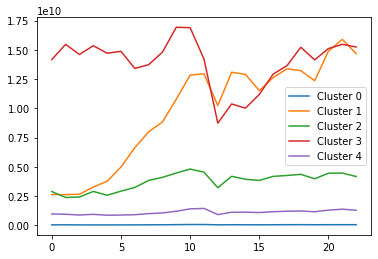

In [40]:
import matplotlib.pyplot as plt
for i in np.arange(5):
  plt.plot(model.cluster_centers_[i, :], label="Cluster {}".format(i))
plt.legend()

貿易量の多さで分類されているようです。これでも意味はありますが、時間的な傾向の違いで分類したい場合、何らかの方法でデータを正規化するのが良いでしょう。